# Demo for *ZeoSyn: A Comprehensive Zeolite Synthesis Dataset Enabling Machine-learning Rationalization of Hydrothermal Parameters*

Elton Pan,† Soonhyoung Kwon,‡ Zach Jensen,† Mingrou Xie,‡ Rafael Gomez-Bombarelli,† Manuel Moliner,¶ Yuriy Roman,‡ and Elsa Olivetti∗,†

† Department of Materials Science and Engineering, Massachusetts Institute of Technology, Cambridge, Massachusetts 02139, United States

‡ Department of Chemical Engineering, Massachusetts Institute of Technology, Cambridge, Massachusetts 02139, United States

¶ Instituto de Tecnolog ́ıa Qu ́ımica, Universitat Politecnica de Valencia-Consejo Superior de
Investigaciones Cient ́ıficas, 46022 Valencia, Spain

<p align="center">
  <img src="figures/TOC.png" width="1000"/> 
</p>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pickle
import shap
import matplotlib.pyplot as plt
from matplotlib import cm
from rdkit import Chem
from matplotlib.colors import ListedColormap
from utils import rename_disordered_interrupted, clean_cbus

# 1) Dataset visualization

In [2]:
# Load ZeoSyn dataset
df = pd.read_excel('dataset/ZEOSYN.xlsx').drop(columns = 'Unnamed: 0')
df = df[~df['Si'].isna()].reset_index().drop(columns = 'index') # Remove empty rows
df

,Si,Al,P,Na,K,Li,Sr,Rb,Cs,Ba,...,osda1 smiles,osda2 smiles,osda3 smiles,osda1 formula,osda2 formula,osda3 formula,Code1,Code2,Code3,year
0,0.030769,0.000000,0.0,0.0,0.001538,0.000000,0.0,0.0,0.0,0.0,...,C[N+]12CCCC[C@@H]1[C@H]1C[C@@H](C2)[C@@H]2CCCC...,NaN,NaN,C16H29N2,NaN,NaN,AFI,NaN,NaN,2002.0
1,0.105263,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,C[N+]12CCCC[C@@H]1[C@H]1C[C@@H](C2)[C@@H]2CCCC...,NaN,NaN,C16H29N2,NaN,NaN,AFI,NaN,NaN,2002.0
2,0.021959,0.000000,0.0,0.0,0.002635,0.000000,0.0,0.0,0.0,0.0,...,C[N+](C)(C)C12CC3CC(CC(C3)C1)C2,NaN,NaN,C13H24N,NaN,NaN,AFI,NaN,NaN,2002.0
3,0.046512,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,C[N+](C)(C)C12CC3CC(CC(C3)C1)C2,NaN,NaN,C13H24N,NaN,NaN,AFI,NaN,NaN,2002.0
4,0.021368,0.008547,0.0,0.0,0.000000,0.004274,0.0,0.0,0.0,0.0,...,CC[N+](CC)(CC)CC,C[N+](C)(C)C,NaN,C8H20N,C4H12N,NaN,BPH,NaN,NaN,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23956,0.967742,0.032258,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,CC[N+]1(CC)CC2CC3CC(C2)CC1C3,NaN,NaN,C14H26N,NaN,NaN,CHA,NaN,NaN,2000.0
23957,0.975610,0.024390,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,CC[N+]1(CC)CC2CC3CC(C2)CC1C3,NaN,NaN,C14H26N,NaN,NaN,CHA,NaN,NaN,2000.0
23958,0.985915,0.014085,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,CC[N+]1(CC)CC2CC3CC(C2)CC1C3,NaN,NaN,C14H26N,NaN,NaN,AFI,NaN,NaN,2000.0
23959,0.990099,0.009901,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,CC[N+]1(CC)CC2CC3CC(C2)CC1C3,NaN,NaN,C14H26N,NaN,NaN,AFI,NaN,NaN,2000.0


## Get compositions
Here, we visualize the distributions of Si/Al and Al/P ratios

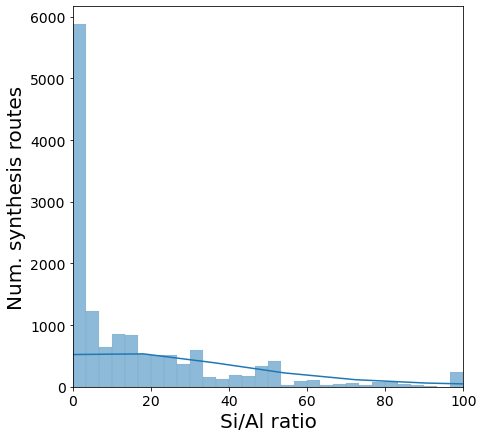

In [3]:
# Visualize distribution of Si/Al ratio
xlim = (0,100)
plt.figure(figsize=(7,7))
sns.histplot(df['Si']/df['Al'], bins=30, binrange=xlim, kde=True)
plt.xlabel('Si/Al ratio',fontsize=20)
plt.ylabel('Num. synthesis routes',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(*xlim)
plt.show()

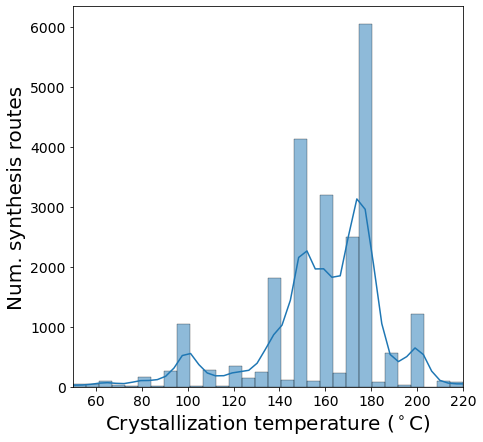

In [4]:
# Visualize distribution of crystallization temperature
xlim = (50,220)
plt.figure(figsize=(7,7))
sns.histplot(df['cryst_temp'], bins=30, binrange=xlim, kde=True)
plt.xlabel('Crystallization temperature ($^\circ$C)',fontsize=20)
plt.ylabel('Num. synthesis routes',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(*xlim)
plt.show()

## Organic structure-directing agents (OSDAs)

In [5]:
# OSDA smiles
df['osda1 smiles'].value_counts()

CC[N+](CC)(CC)CC                            1866
CCC[N+](CCC)(CCC)CCC                        1457
C[N+](C)(C)CCCCCC[N+](C)(C)C.[OH-].[OH-]     648
C[N+](C)(C)C                                 618
C1CCCNCC1                                    546
                                            ... 
Oc1cccc(O)c1                                   1
C1OCOCO1                                       1
OCCO                                           1
CC[N+]1(CC)C(C)CC[C@@H]2CCCCC21                1
C1CCCC(C2CCCC2)(N2CCCCCCN2)CCC1                1
Name: osda1 smiles, Length: 879, dtype: int64

Here we look at some of the most frequent OSDAs in the dataset

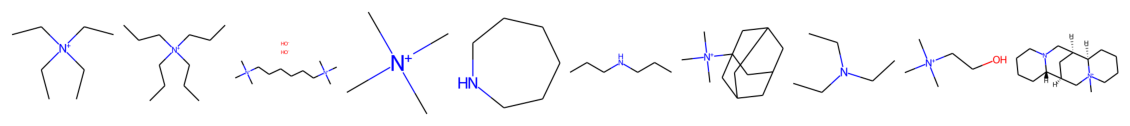

In [6]:
osdas = [Chem.MolFromSmiles(x) for x in df['osda1 smiles'].value_counts().keys()[:10]] # x is SMILES string of OSDA
plt.figure(figsize=(20,5))
plt.imshow(Chem.Draw.MolsToImage(osdas))
plt.axis('off')
plt.show()

We can take one step further and visualize the top 50 OSDAs in the following dendrogram, clustered using hierarchical clustering of their Morgan fingerprints. One can observe the different types of OSDAs, such as cyclic, spiro, linear etc. The code to generate this dendrogram can be found in `visualization.ipynb`.

Interestingly, we observe a significant correlation between OSDA size (orange) and zeolite pore size (purple).

<p align="center">
  <img src="figures/osdas_top50.png" width="1000"/> 
</p>

## Precursors
Precursors (eg. Si source, Al source, Na source) are also included in the dataset

In [7]:
# Precursors
df['precursors']

0                                  KOH, Aerosil 200
1                       tetraethylorthosilicate, HF
2                                  KOH, Aerosil 200
3                                                HF
4        aluminum hydroxide, colloidal silica, LiCl
                            ...                    
23956                NaOH, Banco N silicate, LZY-62
23957                      NaOH, Cabosil M5, LZY-52
23958                      NaOH, Cabosil M5, LZY-52
23959               NaOH, Reheis F-2000, Cabosil M5
23960                           NaOH, Tosoh 390 HUA
Name: precursors, Length: 23961, dtype: object

## Zeolite products

Zeolite products are provided in terms of their 3-letter IZA code (eg. 'AFI', 'CHA')

In [8]:
# Framework products 
df[['Code1', 'Code2', 'Code3']]

,Code1,Code2,Code3
0,AFI,NaN,NaN
1,AFI,NaN,NaN
2,AFI,NaN,NaN
3,AFI,NaN,NaN
4,BPH,NaN,NaN
...,...,...,...
23956,CHA,NaN,NaN
23957,CHA,NaN,NaN
23958,AFI,NaN,NaN
23959,AFI,NaN,NaN


# 2) Zeolite framework-level SHAP
Framework-level SHAP analysis revealing the top 10 (out of 43) most important synthesis parameters favoring the formation of specific frameworks.

In [9]:
# Define custom color map
color_range = (0, 0.75) # user-defined range of colormaps, max range is (0,1)

top = cm.get_cmap('Blues_r', 128) # top colormap (reversed)
bottom = cm.get_cmap('Oranges', 128) # bottom colormap
colors = np.vstack((top(np.linspace(1-color_range[1], 1-color_range[0], 128)),
                       bottom(np.linspace(color_range[0], color_range[1], 128))))
cmap = ListedColormap(colors, name='OrangeBlue')

# Load pre-computed SHAP values
with open('shap/shap_values.pkl', 'rb') as handle:
    shap_values = pickle.load(handle)

# Load test background dataset for SHAP
X_test_masked = pd.read_csv('shap/X_test_masked.csv').drop(columns = 'Unnamed: 0')

# Zeolite IZA codes
zeos = ['*-ITN', '*-SVY', '*BEA', '*BEA/BEC', '*CTH', '*MRE', '*SFV', '*STO', '*UOE', '-CLO', '-IFT', '-IRY', '-ITV', '-LIT', '-SVR', 'ABW', 'ACO', 'AEI', 'AEI/CHA', 'AEL', 'AEN', 'AFI', 'AFN', 'AFO', 'AFR', 'AFS', 'AFV', 'AFX', 'AFX/CHA', 'AFY', 'ANA', 'APC', 'APD', 'AST', 'ASU-12', 'ASU-14', 'ASU-16', 'ASV', 'ATN', 'ATO', 'ATS', 'ATT', 'ATV', 'AVE', 'AVL', 'AWO', 'AWW', 'BCT', 'BEC', 'BOG', 'BPH', 'BSV', 'CAN', 'CAS', 'CDO', 'CFI', 'CGF', 'CGS', 'CHA', 'CHA/AEI', 'CON', 'CSV', 'CZP', 'DDR', 'DFO', 'DFT', 'DOH', 'EAB', 'EDI', 'EEI', 'EMT', 'EON', 'ERI', 'ERI/OFF', 'ESV', 'ETL', 'ETR', 'EUO', 'EWS', 'FAU', 'FAU/EMT', 'FDU-4', 'FER', 'Failed', 'GIS', 'GME', 'GON', 'HEU', 'IFO', 'IFR', 'IFW', 'IHW', 'IM-14', 'IMF', 'IRR', 'ISV', 'ISV/BEC', 'ITE', 'ITG', 'ITH', 'ITQ-21', 'ITQ-43', 'ITR', 'ITT', 'ITW', 'IWR', 'IWS', 'IWV', 'IWW', 'JBW', 'JRY', 'JSR', 'JST', 'JSW', 'KFI', 'LAU', 'LEV', 'LOS', 'LTA', 'LTF', 'LTJ', 'LTL', 'LTN', 'MAZ', 'MEI', 'MEL', 'MEL/MFI', 'MEL/ZSM-55', 'MER', 'MFI', 'MFI/MEL', 'MFS', 'MOR', 'MOR/MFI', 'MOZ', 'MRT', 'MSE', 'MSO', 'MTF', 'MTN', 'MTT', 'MTW', 'MVY', 'MWF', 'MWW', 'NAT', 'NES', 'NON', 'NSI', 'NUD-1', 'OFF', 'OWE', 'PAU', 'PHI', 'PKU-17', 'PON', 'POR', 'POS', 'PTY', 'PUN', 'PWN', 'PWO', 'PWW', 'RHO', 'RRO', 'RSN', 'RTE', 'RTH', 'RUT', 'RUT/RTH', 'RWY', 'SAF', 'SAO', 'SAS', 'SAT', 'SAV', 'SBE', 'SBN', 'SFE', 'SFF', 'SFG', 'SFH', 'SFN', 'SFO', 'SFS', 'SGT', 'SOD', 'SOF', 'SOR', 'SOS', 'SOV', 'SSY', 'STF', 'STF/SFF', 'STI', 'STT', 'STW', 'SU-65', 'SU-67', 'SU-74', 'SU-77', 'SU-79', 'SVV', 'SWY', 'SYSU-3', 'SZR', 'THO', 'TON', 'TON/MTT', 'TUN', 'UFI', 'UOS', 'UOV', 'USI', 'UTL', 'UWY', 'VET', 'VFI', 'YFI', 'ZON']

# Model feature names
X_cols = {'Si': 'Si', 'Al': 'Al', 'P': 'P', 'Na': 'Na', 'K': 'K', 'Li': 'Li', 'Sr': 'Sr', 'Rb': 'Rb', 'Cs': 'Cs', 'Ba': 'Ba', 'Ca': 'Ca', 'F': 'F', 'Ge': 'Ge', 'Ti': 'Ti', 'B': 'B', 'Mg': 'Mg', 'Ga': 'Ga', 'Zn': 'Zn', 'Be': 'Be', 'W': 'W', 'Cu': 'Cu', 'Sn': 'Sn', 'Zr': 'Zr', 'V': 'V', 'H2O': 'H$_2$O', 'sda1': 'OSDA amount', 'OH': 'OH', 'cryst_time': 'Crystallization time', 'cryst_temp': 'Crystallization temp', 'osda1_asphericity_mean_0': 'OSDA asphericity', 'osda1_axes_mean_0': 'OSDA axis 1', 'osda1_axes_mean_1': 'OSDA axis 2', 'osda1_formal_charge': 'OSDA charge', 'osda1_free_sasa_mean_0': 'OSDA SASA', 'osda1_mol_weight': 'OSDA molecular weight', 'osda1_npr1_mean_0': 'OSDA NPR 1', 'osda1_npr2_mean_0': 'OSDA NPR 2', 'osda1_num_rot_bonds_mean_0': 'OSDA rotatable bonds', 'osda1_pmi1_mean_0': 'OSDA PMI 1', 'osda1_pmi2_mean_0': 'OSDA PMI 2', 'osda1_pmi3_mean_0': 'OSDA PMI 3', 'osda1_spherocity_index_mean_0': 'OSDA spherocity', 'osda1_volume_mean_0': 'OSDA volume'}

 # Mask out non-relevant features
shap_cols     = [] # columns to remain
shap_col_idxs = [] # their indices
for col_idx, col in enumerate(X_cols.keys()):
        shap_cols.append(col)
        shap_col_idxs.append(col_idx)

shap_values_masked = [x[:,shap_col_idxs] for x in shap_values]

In [10]:
def plot_zeo_shap(zeo, cols, max_display = 5, plot_size = (8,5), xlim = None, alpha = 0.1, cmap = 'coolwarm', xlabel_size = None, color_bar = True, sort = True, return_top_shap_feats = False, savepath = None):
    '''
    Plots SHAP plot for a specific zeolite
    
    Args:
    zeo: zeolite 3-letter code
    cols: synthesis feature columns to consider
    '''
    
    zeo_idx = np.where(np.array(zeos) == zeo)[0][0] # Find class index
    
    zeo_shap = pd.DataFrame(shap_values_masked[zeo_idx], columns = X_cols.values())[cols]  # Get SHAP values for zeo
    
    # Summary plot
    plt.figure(dpi = 300)
    shap.summary_plot(np.array(zeo_shap), X_test_masked[cols],
                    max_display = max_display,
                    cmap = cmap,
                    show = False, 
                    alpha = alpha, 
                    color_bar = color_bar,
                    color_bar_label='Synthesis parameter',
                    plot_size = plot_size,
                    sort = sort,
                     )

    fig, ax = plt.gcf(), plt.gca()

    ax.set_xlabel('SHAP contribution to \n' + r'$\bf{' + zeo + '}$ formation', fontsize = xlabel_size)
    plt.xticks(fontsize=15)
    
    if xlabel_size != None:
        ax.tick_params(axis='y', which='major', labelsize=xlabel_size)
    
    top_shap_feat = ax.get_yticklabels()[-1].get_text() # str of feature name
    top_shap_feat_ub = np.quantile(zeo_shap[top_shap_feat], 0.99)*1.2 # upper
    top_shap_feat_lb = np.quantile(zeo_shap[top_shap_feat], 0.01)*1.2 # lower

    if xlim != None:
        ax.set_xlim(*xlim)
    else:
        ax.set_xlim(-max([top_shap_feat_ub, top_shap_feat_lb]), max([top_shap_feat_ub, top_shap_feat_lb]))
    
    plt.xticks([0.])
    
    if savepath != None:
        plt.savefig(savepath, dpi = 200)
    
    if return_top_shap_feats: # return a list of top SHAP features
        top_shap_feats = [ax.get_yticklabels()[-i].get_text() for i in range(max_display)]
        plt.close(fig)
        return top_shap_feats
    else:
        plt.show()

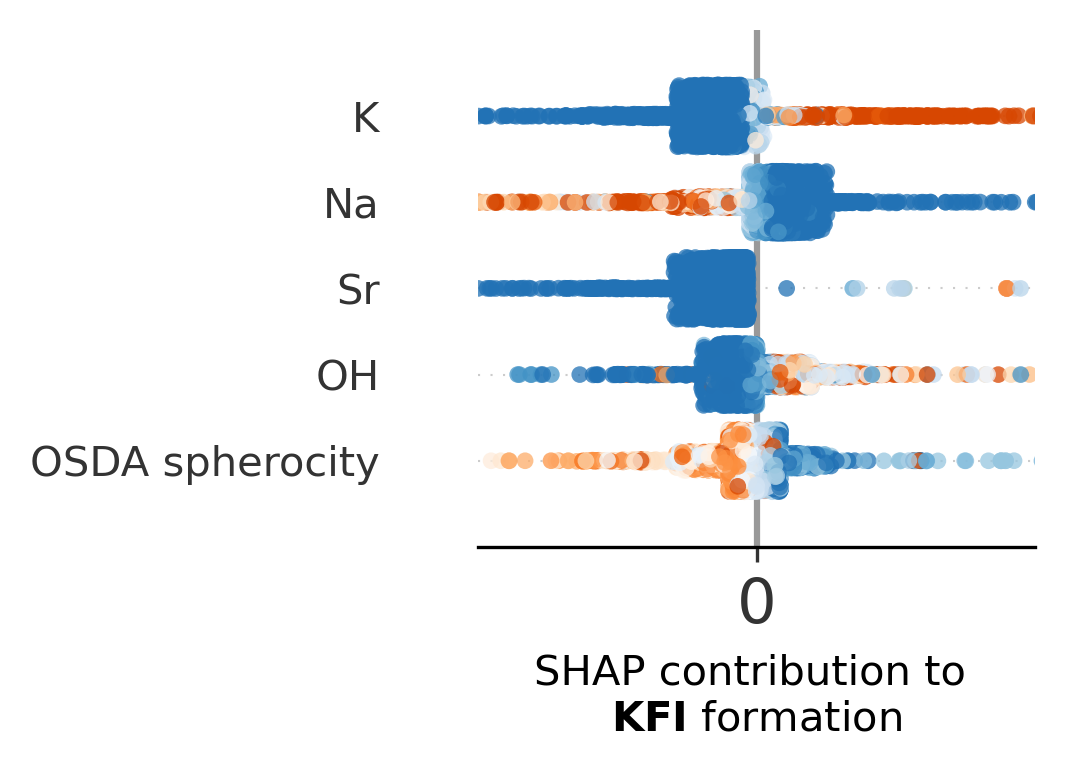

In [11]:
# Framework-level SHAP example - Try it out yourself by changing the "zeo" parameter!
plot_zeo_shap(zeo='KFI', cols=X_cols.values(), cmap=cmap, alpha=0.75, max_display=5, plot_size=(4,2.5), xlabel_size=10, color_bar=False)

Each framework belongs to 1 out of 3 types of synthesis based on its top synthesis parameters: 1) Gel-dominated synthesis (CAN, KFI) where most top parameters are inorganic-related, 2) OSDA-dominated synthesis (ISV, ITE) where most top parameters are OSDA-related, and 3) balanced syn- thesis (IWW, RUT) where even attribution is given to inorganic and OSDA parameters. Every point is an individual synthesis colored by the value of synthesis parameter (orange and blue colors indicate high and low values, respectively).

<p align="center">
  <img src="figures/framework_shap.png" width="1200"/> 
</p>

# 3) Zeolite CBU-level SHAP
CBU-level SHAP analysis of large CBUs showing OSDA parameters favoring their formation.

In [12]:
# Load zeolite structural descriptors
df_zeos = pd.read_csv('dataset/zeolite_descriptors.csv').rename(columns = {'Unnamed: 0': 'Code'})

df_zeos['cbu'] = list(map(clean_cbus, df_zeos['cbu'].values))
df_zeos['Code'] = df_zeos['Code'].apply(rename_disordered_interrupted)

In [13]:
# Find unique set of cbus present in dataset
cbus_unique = []
for cbu_combination in df_zeos['cbu'].value_counts().index:
    for cbu in cbu_combination:
        if cbu not in cbus_unique:
            cbus_unique.append(cbu)

# Get one-hot encoding of cbus
cbu_oh = np.zeros([len(df_zeos), len(cbus_unique)]) # initialize one-hot encoding with zeros
cbu_oh = pd.DataFrame(cbu_oh, columns = cbus_unique, index = df_zeos.index)

for idx in df_zeos.index:
    cbus = df_zeos.loc[idx]['cbu']

    if (cbus == None) or (len(cbus) == 0): # either None or empty list
        pass
    elif (len(cbus) > 0) and (type(cbus) == list): # if non-empty list of cbus exists 

        for cbu in cbus: # modify one-hot encoding of cbus
            cbu_oh.loc[idx, cbu] = 1.0

# append one-hot encoding of CBUs to df_zeos
df_zeos = pd.concat([df_zeos, cbu_oh], axis = 1)

In [14]:
def plot_cbu_shap(cbu, cols, max_display = 5, plot_size = (8,5), xlim = None, alpha = 0.1, cmap = 'coolwarm', xlabel_size = None, color_bar = True, sort = True, return_top_shap_feats = False, savepath = None):
    '''
    Plots SHAP plot for a specific composite building unit (CBU)
    
    Args:
    cbu: CBU 3-letter code
    cols: synthesis feature columns to consider
    '''
    
    # Construct SHAP matrix for a specific CBU

    zeos_with_cbu = []
    zeos_wo_cbu = []
    zeo_idxs = []
    zeo_wo_idxs = []
    for zeo in df_zeos['Code']:
        if (zeo in zeos):
            if (df_zeos[df_zeos['Code'] == zeo][cbu] == 1.).item(): # if CBU present
                zeo_idx = np.where(np.array(zeos) == zeo)[0][0]
                zeo_idxs.append(zeo_idx)
                zeos_with_cbu.append(zeo)

            else: # else CBU not present
                zeo_idx = np.where(np.array(zeos) == zeo)[0][0]
                zeo_wo_idxs.append(zeo_idx)
                zeos_wo_cbu.append(zeo)


    cbu_shap = [pd.DataFrame(shap_values_masked[zeo_idx], columns = X_cols.values())[cols] for zeo_idx in zeo_idxs] # Get SHAP values for zeos with this CBU
    cbu_not_present_shap = [pd.DataFrame(shap_values_masked[zeo_wo_idx], columns = X_cols.values())[cols] for zeo_wo_idx in zeo_wo_idxs] # Get SHAP values for zeos without this CBU

    sum_shap = np.zeros_like(cbu_shap[0]) # Initialize final SHAP matrix

    for m in cbu_shap: # Add up SHAP matrices contributing to a specific CBU
        sum_shap += m

    # Summary plot
    plt.figure(dpi = 300)
    shap.summary_plot(np.array(sum_shap), 
                      X_test_masked[cols],
                    max_display = max_display,
                    cmap = cmap, show = False, alpha = alpha, color_bar_label='Synthesis parameter',
                    plot_size = plot_size,
                    color_bar = color_bar,
                    sort = sort,
                      
                     )
    fig, ax = plt.gcf(), plt.gca()
    
    top_shap_feat = ax.get_yticklabels()[-1].get_text() # str of feature name
    top_shap_feat_ub = np.quantile(sum_shap[top_shap_feat], 0.99)*1.2 # upper
    top_shap_feat_lb = np.quantile(sum_shap[top_shap_feat], 0.01)*1.2 # lower
    
    ax.set_xlabel('SHAP contribution to \n $\it{' + cbu + '}$ formation', fontsize = xlabel_size)
    plt.xticks(fontsize=15)
    
    if xlabel_size != None:
        ax.tick_params(axis='y', which='major', labelsize=xlabel_size)
        
    if xlim != None:
        ax.set_xlim(*xlim)
    else:
        ax.set_xlim(-max([top_shap_feat_ub, top_shap_feat_lb]), max([top_shap_feat_ub, top_shap_feat_lb]))
    
    plt.xticks([0.])
    
    if savepath != None:
        plt.savefig(savepath, dpi = 200)
    
    if return_top_shap_feats: # return a list of top SHAP features
        top_shap_feats = [ax.get_yticklabels()[-i].get_text() for i in range(max_display)]
        plt.close(fig)
        return top_shap_feats
    else:
        plt.show()

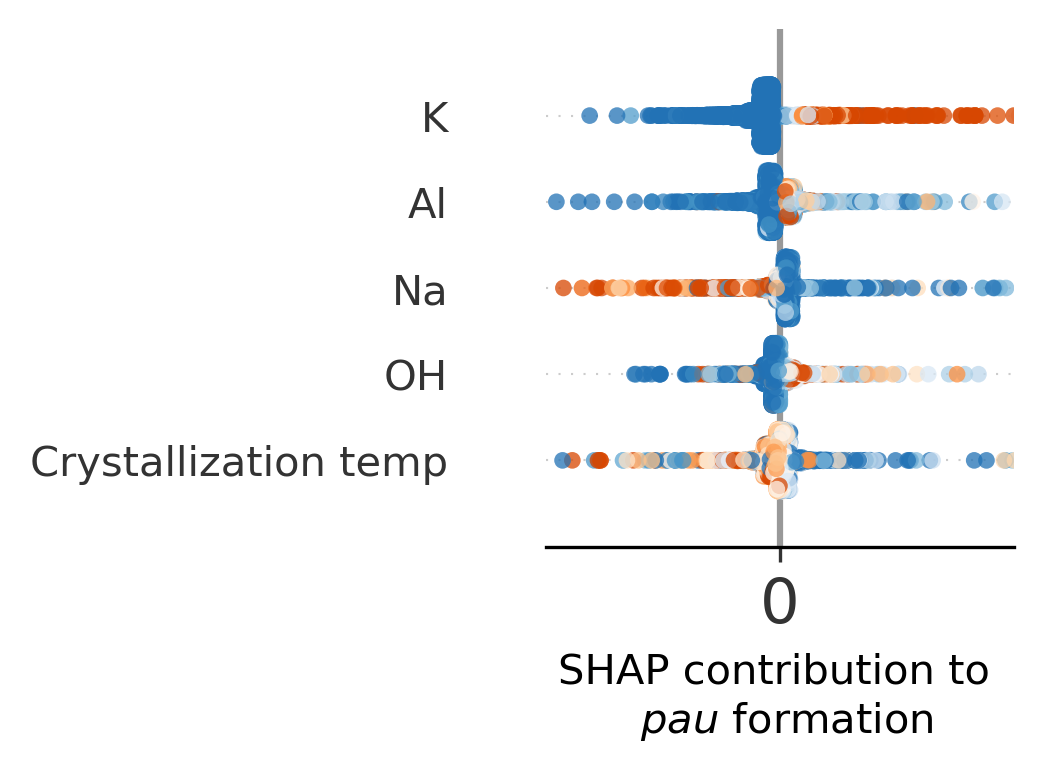

In [15]:
# CBU-level SHAP example - Try it out yourself by changing the "cbu" parameter!
plot_cbu_shap(cbu='pau', cols=X_cols.values(), cmap=cmap, alpha=0.75, max_display=5, plot_size=(4,2.5), xlabel_size=10, color_bar=False)

## Small CBUs
We uncover the most important inorganic parameters driving the formation of a selection of 4 small CBUs in the figure below. As shown, the synthesis of small CBUs shown are all inorganic/gel-dominated instead of OSDA-dominated with the top 5 parameters relating to the inorganic components.

<p align="center">
  <img src="figures/small_cbu_shap.png" width="1000"/> 
</p>

## Large CBUs
In contrast to small CBUs, the formation of large CBUs are influenced by OSDA parameters due to the need for a structure-directing effect by OSDAs. The figure below shows a series of large CBUs (≥ 30 T sites) with an increasing aspect ratio (*pau* < *los* < *ave* < *aft*). 

Interestingly, in the first row, CBU-level SHAP discovers a clear relationship between aspect ratio of the CBU and OSDA asphericity (a measure of the deviation from sphere). For *pau*, low OSDA asphericity (dark blue on positive side) gives rise to positive SHAP values, indicating the need for a spherical OSDA. Indeed, this is due to the symmetrical shape of the pau cage. The inverse is true for *aft*.

<p align="center">
  <img src="figures/large_cbu_shap.png" width="1600"/> 
</p>

For code to generate SHAP for competing phases and intergrowths, refer to `classifier.ipynb`.